# MatplotLib Plots

Table of Contents
1. Data prepping
2. Area Plot
3. Histograms
5. Bar Charts
6. Pie charts
7. Box Plots
8. Scatter Plots
9. Bubble Plots

### Data prepping

In [45]:
#import Numpy and pandas
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [46]:
#read in our data
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [47]:
#view top 5 rows
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


**1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).**

In [48]:
# delete columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


**2. Rename some of the columns so that they make sense.**

In [49]:
#rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

**3. Set the country name as index - useful for quickly looking up countries using .loc method**

In [50]:
#set 'Country' as index
df_can.set_index('Country', inplace=True)
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


**4. Add total column.**

In [51]:
#add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


**5. Create a list of years from 1980 - 2013**

In [52]:
#create a list of years to easily slice years columns later
years = list(range(1980, 2014))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

Import Matplotlib

In [53]:
# import MatplotLib
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Check available styles.

In [54]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [55]:
mpl.style.use('tableau-colorblind10')

*optional you may change the style. For instance, for ggplot-like style:

mpl.style.use(['ggplot'])

## Area Plots


An area chart, also known as a cumulative plot, or Stacked Line Plot, are great for showing how a total and its shares developed over time.

**When to use area charts**

* Use area charts only if you want to show how values develop over time. If you want to show how values differ in different categories, consider a (stacked) bar chart instead.

* Area charts work best for considerably large differences between your values. If the differences between your values are very small, consider a line chart instead. Compared to an area chart, the y-axis of a line chart doesn’t need to start at zero. This means that your y-axis can be stretched to show the tiny differences.

* Area charts work best to show multiple values over time. If you just want to show one value over time, also consider a line chart instead; especially if you don’t want your y-axis to start at zero.  If you only have a few dates, you can also consider using a column chart. 

* Area charts work best if you have many dates. If you have less than ten or so dates, consider a stacked column chart instead. Labelling will be improved and readers have an easier time reading the values.

* Area charts are not the best choice if you want to compare the size of different shares with each other. If you want to show that one share overtook another one, consider a line chart instead.

**How to create better area charts**
* Bring the most important value to the bottom of the chart and use color to make it stand out. Your readers can compare values easier with each other if they have the same baseline.

* Consider turning off automatic labelling and place the labels yourself. Your readers will be able to read the chart faster thanks to that.

* Consider using annotations and highlight ranges to add explanations to your charts. Area charts, like line charts, offer enough space for these annotations. They will make your chart more interesting to read and help readers to figure out what’s going on.

* Consider grouping many tiny values together to one bigger value (e.g. “others”) to clean up the overall look of the chart. 



Last time, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. Let's visualize this as an area plot

First, let's create our dataframe.

In [56]:
#sort data by total column in a descending manner 
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can[years].head()

# transpose the dataframe
df_top5 = df_top5.transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Create an area plot. Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0).

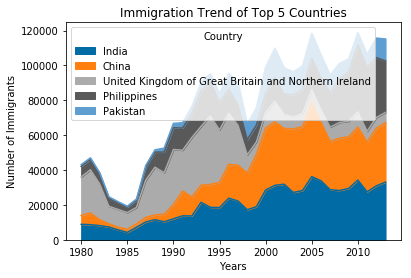

In [57]:
df_top5.plot(kind='area')

# add title and labels
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

To produce an unstacked plot, pass `stacked=False`. The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter. Alpha parameter takes a value between 0 and 1.

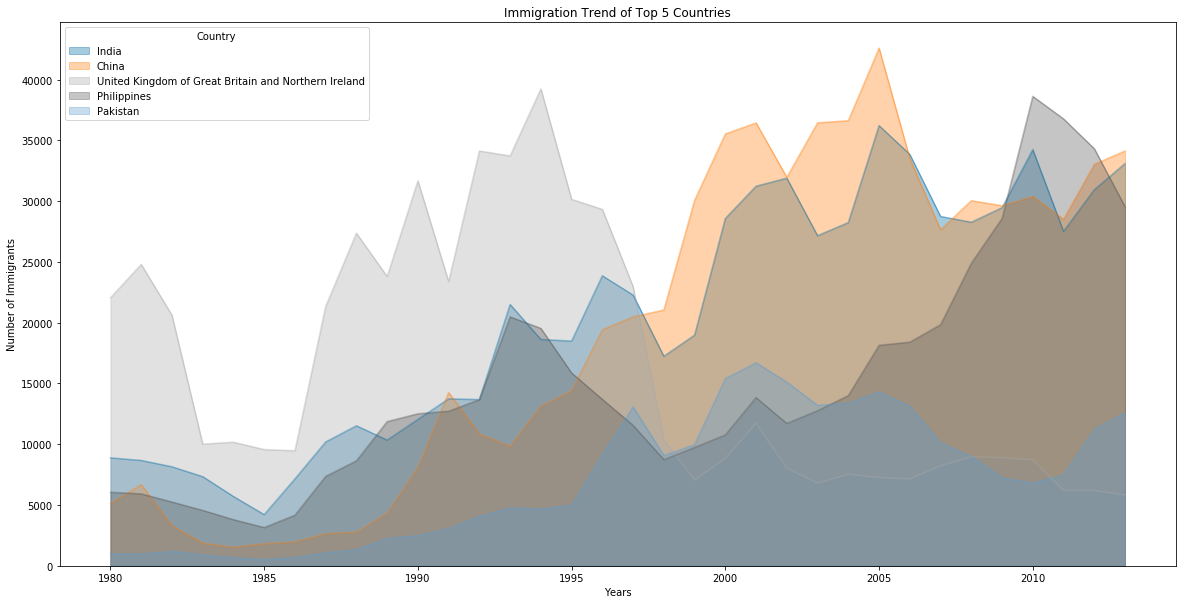

In [58]:
# Modify area plot, to make it unstacked. Change alpha parameter to 0.35 specify figuresize as figsize=(20, 10)
df_top5.plot(kind='area', stacked=False, alpha = 0.35, figsize=(20,10))

# add title and labels
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


### Two types of plotting

There are two styles/options of ploting with `matplotlib`. Plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

This is what we have been using so far.

**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred) **

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "*set_*" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis. 

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later). 

We will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.

Text(0.5,0,'Years')

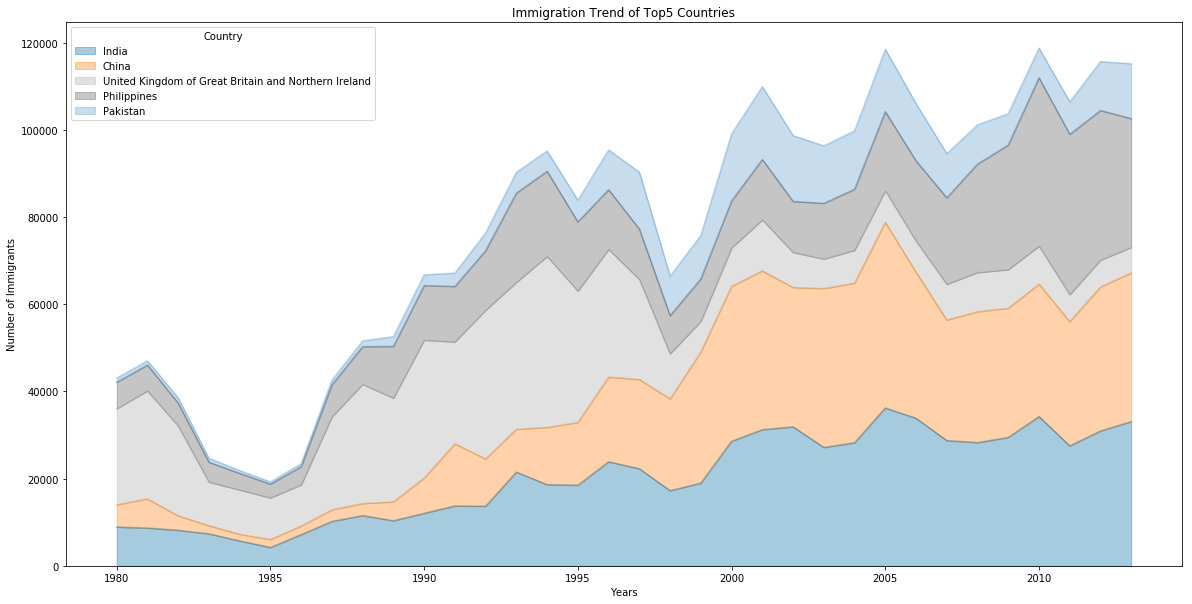

In [59]:
# option 2: has more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Text(0.5,0,'Years')

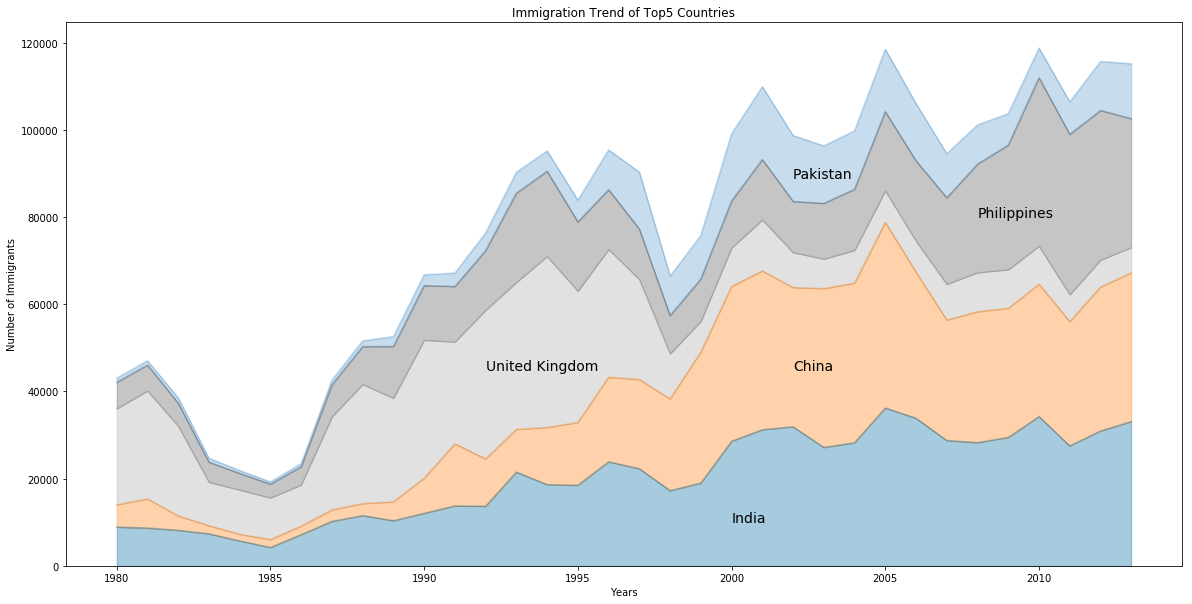

In [60]:
# we can add country names as text
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10), legend=None)

ax.set_title('Immigration Trend of Top5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.text(2000,10000,'India',fontsize=14)
ax.text(2002,45000,'China',fontsize=14)
ax.text(1992,45000,'United Kingdom',fontsize=14)
ax.text(2008,80000,'Philippines',fontsize=14)
ax.text(2002,89000,'Pakistan',fontsize=14)
ax.set_xlabel('Years')

**Question:** Create a stacked area plot to explore the immigrants grouped by continents for the entire time period from 1980 to 2013. Use a transparency value of 0.45.

Step 1: Get the dataset. Use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

Split: Splitting the data into groups based on some criteria.
Apply: Applying a function to each group independently:
.sum()
.count()
.mean() 
.std() 
.aggregate()
.apply()
.etc..
Combine: Combining the results into a data structure.

In [61]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent',axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())

# display top 5 rows
df_continents.head()



,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


In [62]:
# keep only years columns and transpose the dataframe 
df_continents = df_continents[years].transpose()

# display top 5 rows
df_continents.head()

Continent,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
1980,3951,31025,39760,13081,9378,1942
1981,4363,34314,44802,15215,10030,1839
1982,3819,30214,42720,16769,9074,1675
1983,2671,24696,24638,15427,7100,1018
1984,2639,27274,22287,13678,6661,878


Text(0.5,0,'Years')

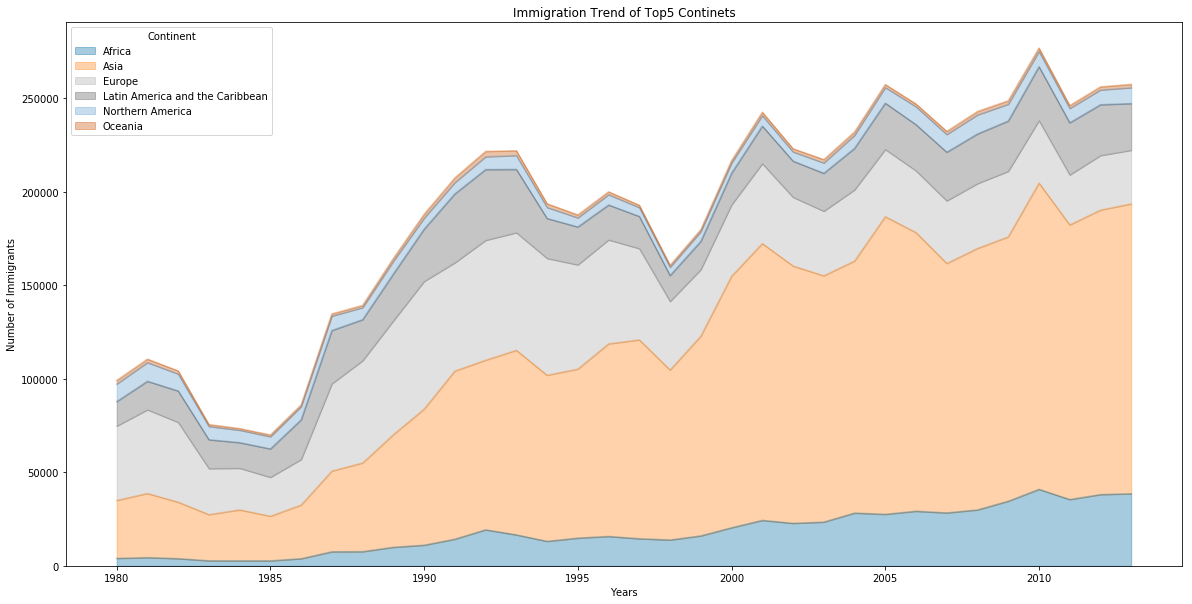

In [63]:
ax = df_continents.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top5 Continets')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years') 

Text(0.5,1,'Immigration Trend of Top5 Continets')

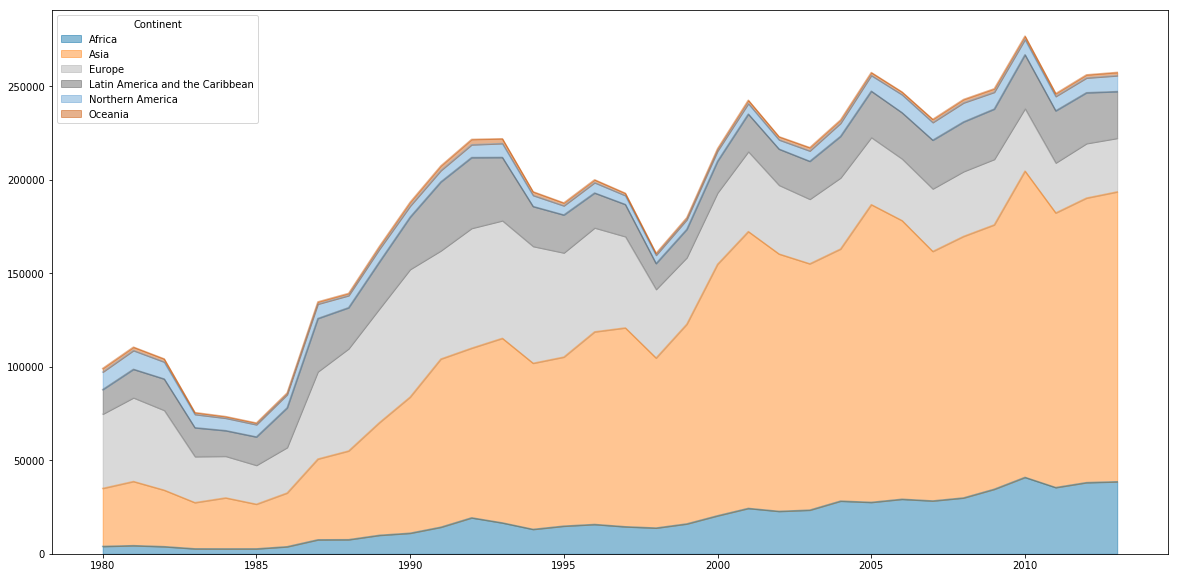

In [64]:
#Plot the data
df_continents.plot(kind='area', alpha=0.45,figsize=(20,10))

ax.set_title('Immigration Trend of Top5 Continets')

**Question:** Use the artist layer to do the same.

In [65]:
# write your answer here


## Histograms
A histogram is a way of representing the frequency distribution of numeric dataset.This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. 

The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin.

Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

Note that histograms are based on area, not height of bars. Histograms often have equally spaced bars (bins), and under these circumstances, the height of the bin does reflect the frequency

**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will use Numpy's `histrogram` method to get the bin ranges and frequency counts as follows:

In [66]:
# let's quickly view the 2013 data
df_can[2013].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [67]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can[2013])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

* 178 countries contributed between 0 to 3412.9 immigrants
* 11 countries contributed between 3412.9 to 6825.8 immigrants
* 1 country contributed between 6285.8 to 10238.7 immigrants, and so on..


We can easily graph this distribution by passing `kind=hist` to `plot()`.

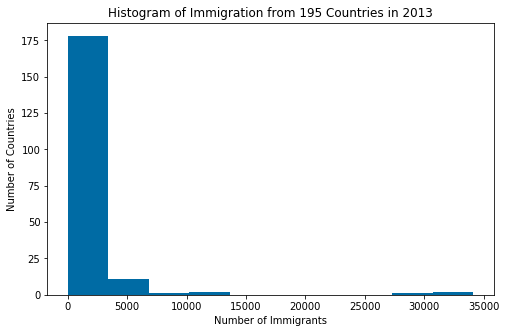

In [68]:
df_can[2013].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

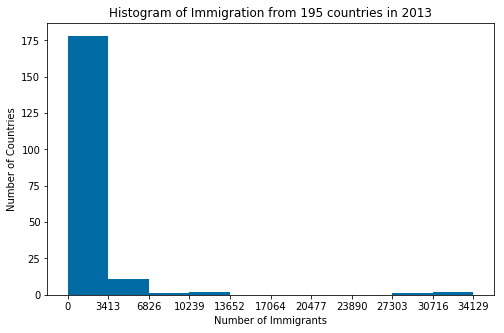

In [69]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can[2013])

#specify bin edges as xticts
df_can[2013].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Side Note: We could use `df_can[2013].plot.hist()`, instead. In fact, throughout this lesson, using `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. That is, passing the type of the plot as argument or method behaves the same.

See the pandas documentation for more info http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html.

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question:** What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [70]:
# create dataset df_DNS
df_DNS = df_can.loc[['Denmark','Sweden','Norway'],years]
df_DNS.head()
#view data set

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59


In [71]:
# transpose dataset and view
df_DNS = df_DNS.transpose()
df_DNS.head()

Country,Denmark,Sweden,Norway
1980,272,281,116
1981,293,308,77
1982,299,222,106
1983,106,176,51
1984,93,128,31


Text(0.5,0,'Number of Years')

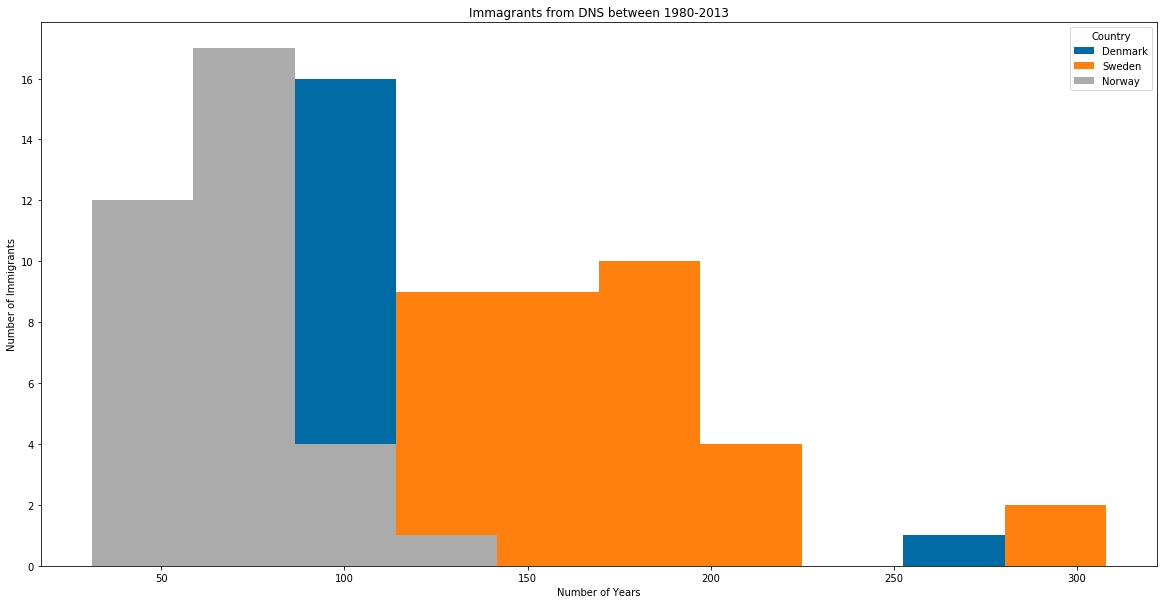

In [72]:
# generate histogram
df_DNS.plot(kind='hist', figsize=(20,10))
plt.title('Immagrants from DNS between 1980-2013') # add a title to the histogram
plt.ylabel('Number of Immigrants') # add y-label
plt.xlabel('Number of Years') # add x-label

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

* increase the bin size to 15 by passing in `bins` parameter
* set transparency to 60% by passing in `alpha` paramemter
* label the xticks by passing in `xticks` paramater
* change the colors of the plots by passing in `color` parameter with values `['coral', 'darkslateblue', 'mediumseagreen']`

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
[ 31.          49.46666667  67.93333333  86.4        104.86666667
 123.33333333 141.8        160.26666667 178.73333333 197.2
 215.66666667 234.13333333 252.6        271.06666667 289.53333333
 308.        ]


Text(0.5,0,'Number of Years')

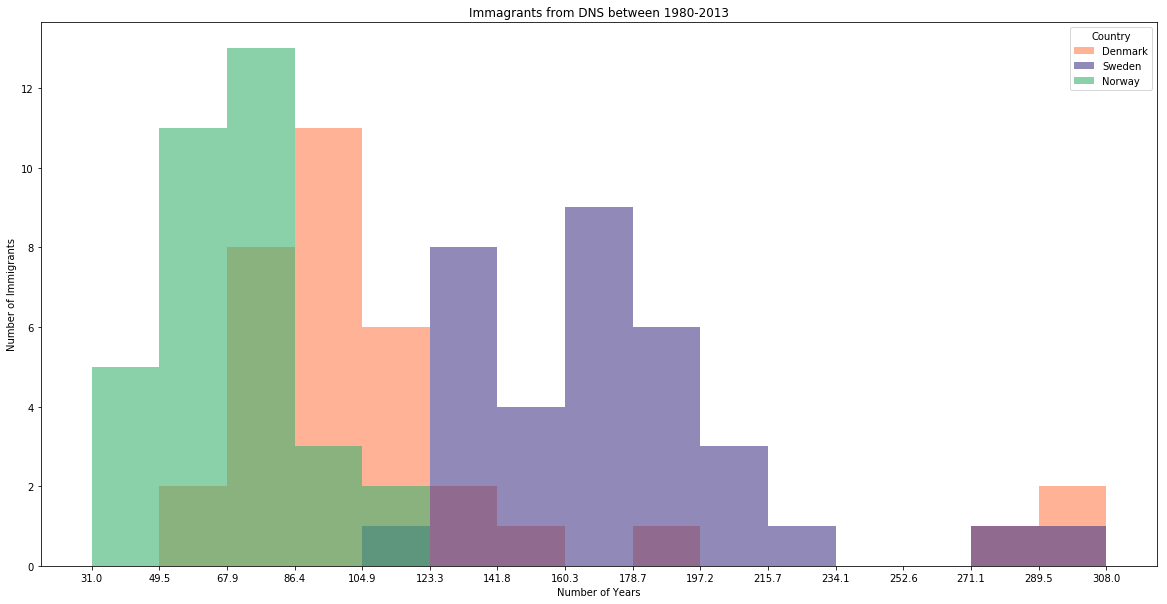

In [73]:
# let's get the x-tick values for bin size of 15
count,bin_edges = np.histogram(df_DNS,15) 
print(count)
print(bin_edges)
# generate histogram
df_DNS.plot(kind='hist', figsize=(20,10),
         bins=15,
         xticks = bin_edges,
         color = ['coral', 'darkslateblue','mediumseagreen'],
         alpha=0.6
         )
plt.title('Immagrants from DNS between 1980-2013') # add a title to the histogram
plt.ylabel('Number of Immigrants') # add y-label
plt.xlabel('Number of Years') # add x-label

Tip: For a full listing of colors available in Matplotlib, run the following code in your python shell:

```python
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

```

In [74]:

for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


**Question:** Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

[37  9  4  6 13  9  5  5  3  3  2  3  1  1  1]
[   0.   134.8  269.6  404.4  539.2  674.   808.8  943.6 1078.4 1213.2
 1348.  1482.8 1617.6 1752.4 1887.2 2022. ]


Text(0.5,0,'Number of Years')

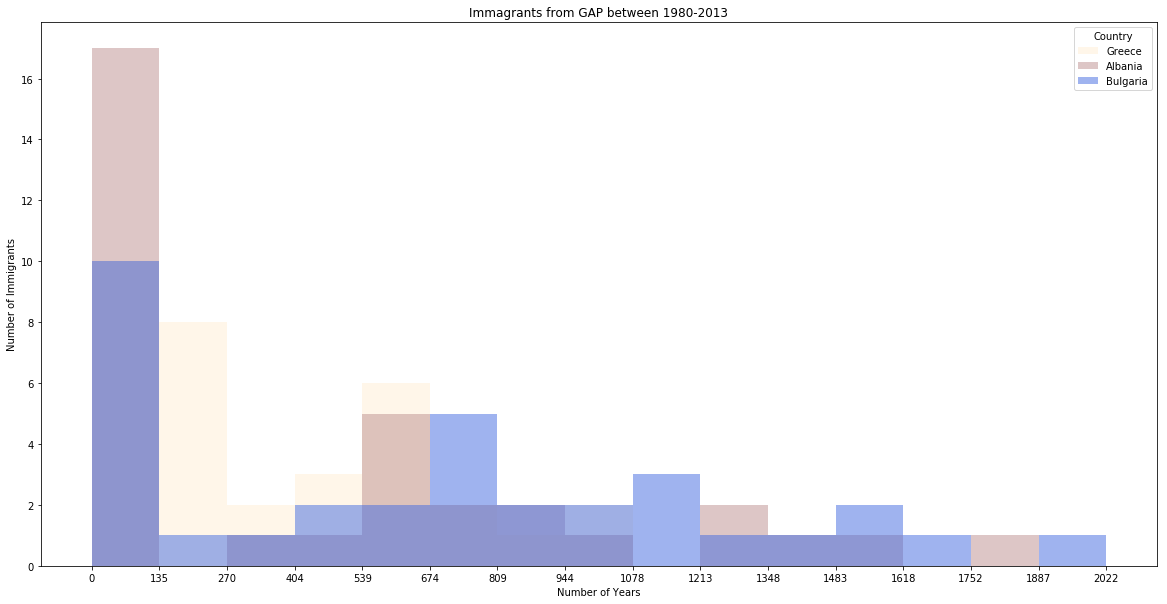

In [75]:
# Your answer here:
df_GAB = df_can.loc[['Greece','Albania','Bulgaria'],years]
#view data set
df_GAB = df_GAB.transpose()

count,bin_edges = np.histogram(df_GAB,15) 
print(count)
print(bin_edges)
# generate histogram
df_GAB.plot(kind='hist', figsize=(20,10),
         bins=15,
         xticks = bin_edges,
         color = ['papayawhip', 'rosybrown','royalblue'],
         alpha=0.5
         )
plt.title('Immagrants from GAP between 1980-2013') # add a title to the histogram
plt.ylabel('Number of Immigrants') # add y-label
plt.xlabel('Number of Years') # add x-label



## Bar Charts (Dataframe) 
A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent categorical variables and numerical variables grouped in intervals.

They are used to compare differences between categories and sometimes to show the changes over time. When showing the change over time, they are suitable for only showing change over a few data points, If there are a large number of data points, line plot should be considered.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a vertical bar plot
* `kind=barh` creates a horizontal bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particuarly useful in analyzing time series data compared to horizontal bar plots. One disadvantage is that they lack space for text labelling at the foot of each bar.


Let's start off by analyzing the effect of Iceland's Financial Crisis:

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [76]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

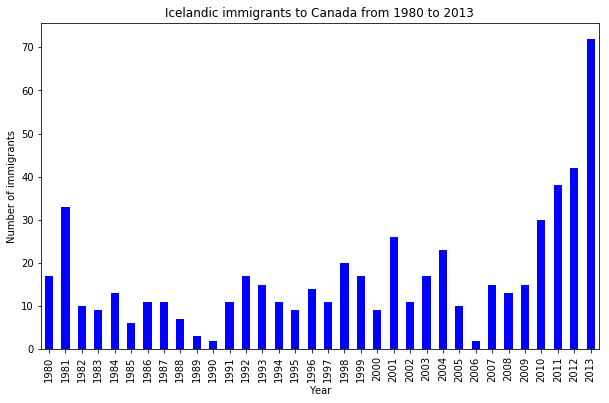

In [77]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6), color='b')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

Read the Matplotlib documentation for more details on annotations: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

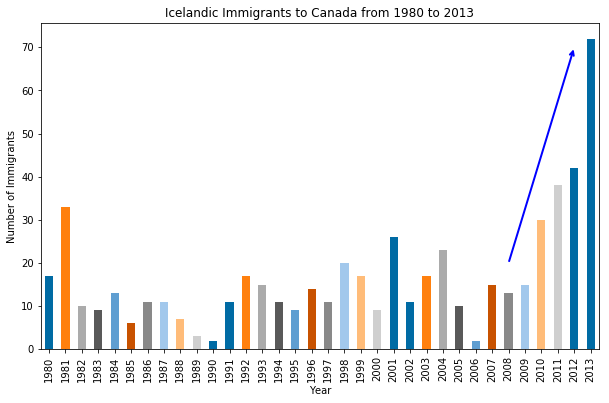

In [78]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

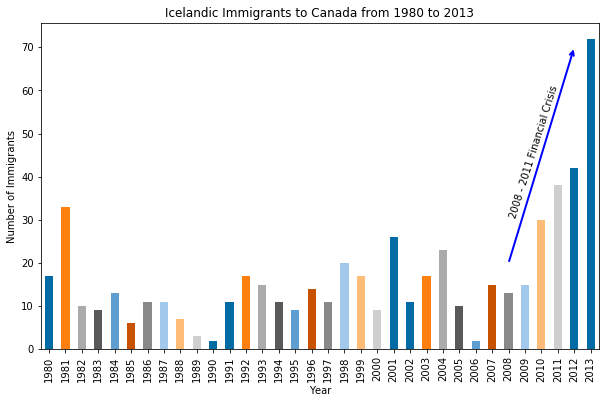

In [79]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate(s= '',                   # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate(s = '2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                        # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                      # based on trial and error to match the arrow
             va='bottom',                        # want the text to be vertically 'bottom' aligned
             ha='left',                          # want the text to be horizontally 'left' algned.
            )

plt.show()

## Horizontal Bar Plot

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categetorical variables.

**Question:** Using the scripting layter and the `df_can` dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

Text(0.5,1,'Immagrants from Top15 Countries')

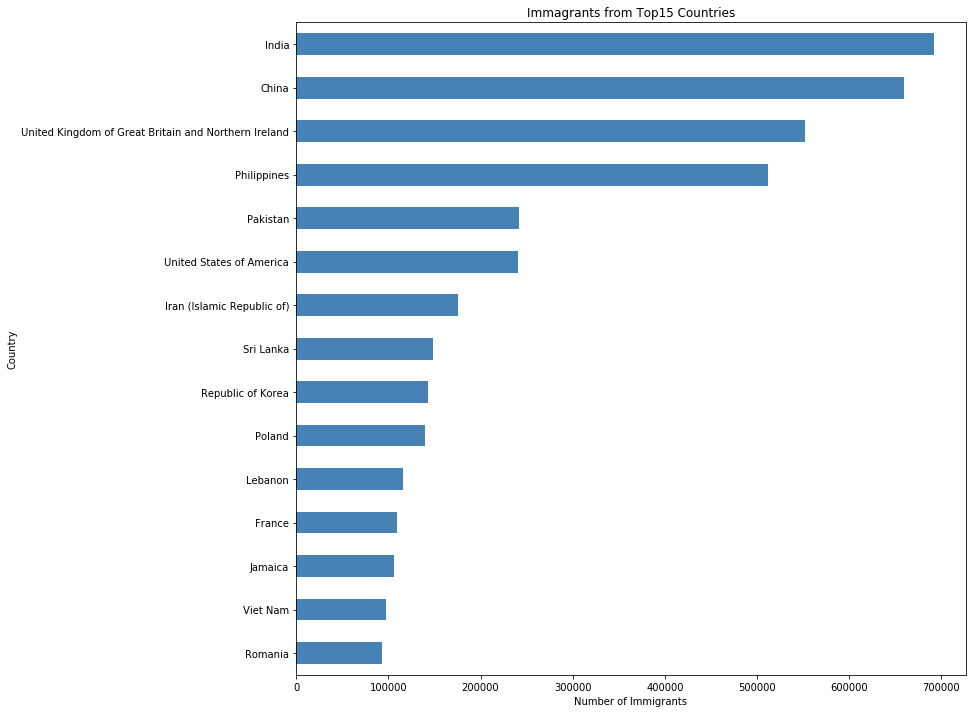

In [80]:
# sort dataframe on 'Total' column 
#df_can.sort_values('Total',ascending=False,inplace=True)
#df_can = df_can.iloc[0:15,-1]

df_can.sort_values('Total',ascending=True,inplace=True)
df_Top15 = df_can['Total'].tail(15)

# get the total immigrants for top 15 countries
df_Top15.plot(kind='barh', figsize=(12,12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Immagrants from Top15 Countries')




Step 2: Plot data:

Use `kind='barh'` to generate a bar chart with horizontal bars.
Make sure to choose a good size for the plot and to label your axes and to give the plot a title.


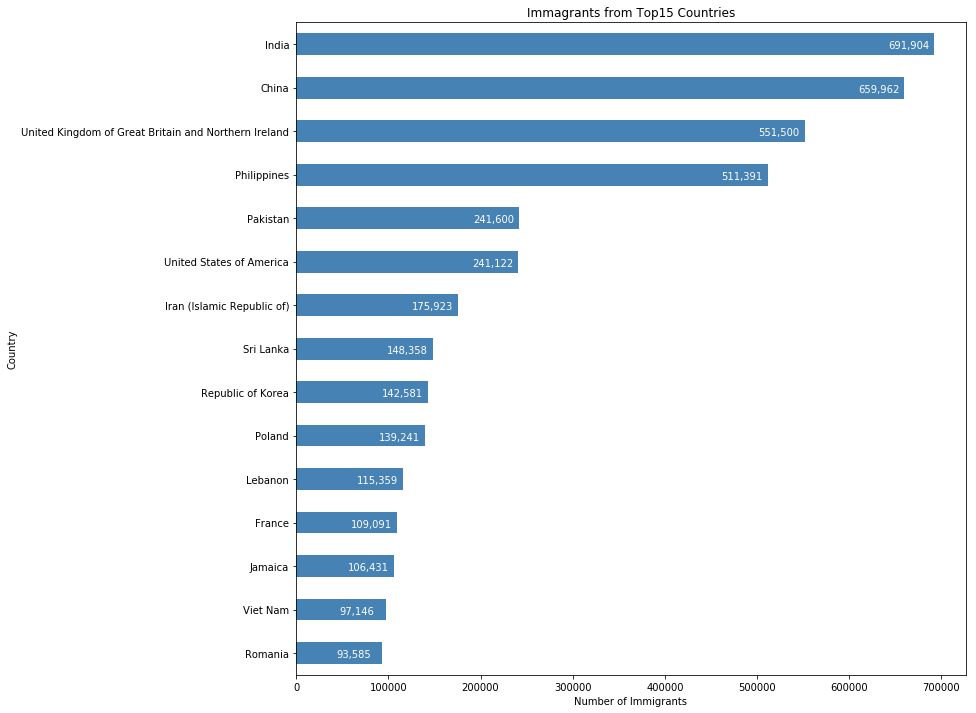

In [81]:
#sort values
df_Top15.sort_values(ascending=True,inplace=True)
df_Top15
# generate plot
df_Top15.plot(kind='barh', figsize=(12,12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Immagrants from Top15 Countries')

for index, value in enumerate(df_Top15):
    label = format (int(value),',')
    plt.annotate(label, xy=(value-50000, index - 0.1) ,color = 'white')


Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

# Pie Charts 
A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.




In [82]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
shadow - Draws a shadow beneath the pie (to give a 3D feel).

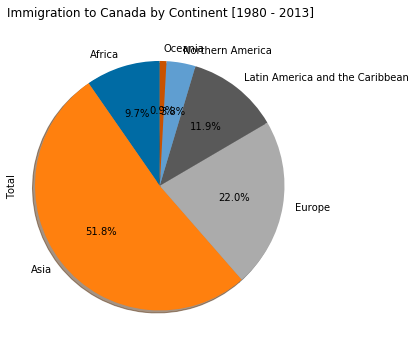

In [83]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [84]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Let's make a few modifications to improve the visuals:

* Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using `plt.legend()`.
* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
* Pass in a custom set of colors for continents by passing in `colors` parameter.
* Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.

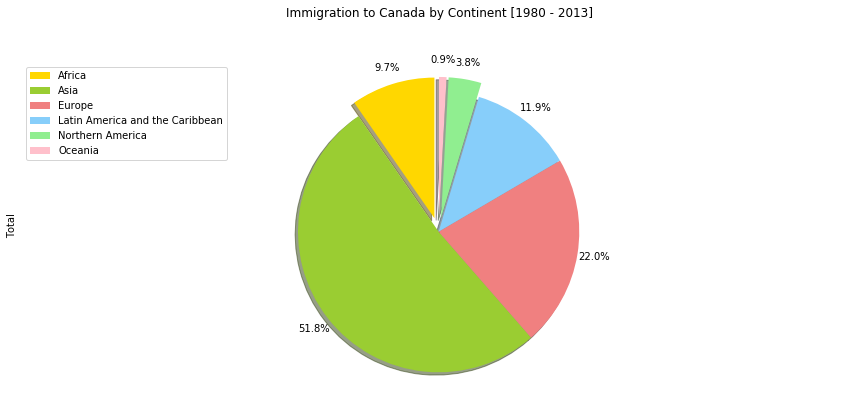

In [85]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

question: plt.show()

**Question:** Use a pie chart to display the proportion (percentage) of new immigrants grouped by DevName for the entire time period from 1980 to 2013. Explode the share of Developed Regions

In [86]:
df_dev.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
DevName,,,,,,,,,,,,,,,,,,,,,
Developed regions,51143,56707,53240,32504,29675,28052,32224,55500,62129,68967,...,46695,45071,45591,47664,46805,44158,36946,39682,39712,1714011
Developing regions,47994,53856,51031,43046,43742,41926,53824,79271,77177,95465,...,210762,201986,186814,195383,201963,232798,209248,216540,217825,4695142


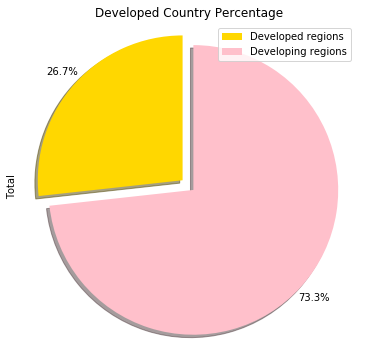

In [87]:
### Enter your answer here
df_dev = df_can.groupby('DevName',axis=0).sum()
df_dev['Total'] = df_dev[years].sum(axis=1)
df_dev.head()
color = ['gold','pink']
explode = [0.1, 0]
df_dev['Total'].plot(kind='pie',
                            figsize=(6, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=color,  # add custom colors
                            explode=explode # 'explode' lowest 3 continents
                            )
plt.axis('equal')
plt.title('Developed Country Percentage')
plt.legend(labels=df_dev.index,loc='upper right')

## Box Plots 

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

To make a `box plot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the  `dataframe.describe()`  method to view the percentiles.) method to view the percentiles.



In [88]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in kind='box'.

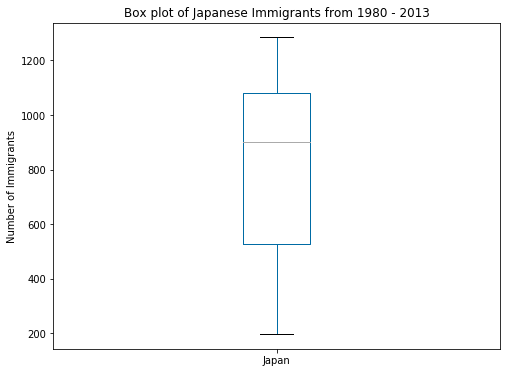

In [89]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:
1. The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
2. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.

In [90]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyize these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.



In [91]:
# Get the dataset for China and India and call the dataframe df_CI.
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [92]:
# view the percentages associated with both countries using the describe() method.
df_CI.describe()


Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


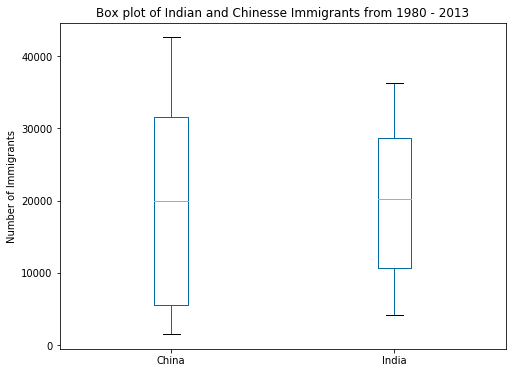

In [93]:
#  Plot data.
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Indian and Chinesse Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to False. You can also specify a different color in case you are not a big fan of the default color.

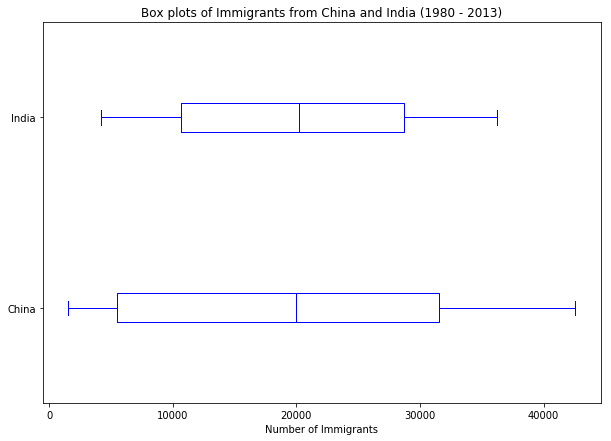

In [94]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

### Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Where
- `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,  
- `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols`.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">

We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:

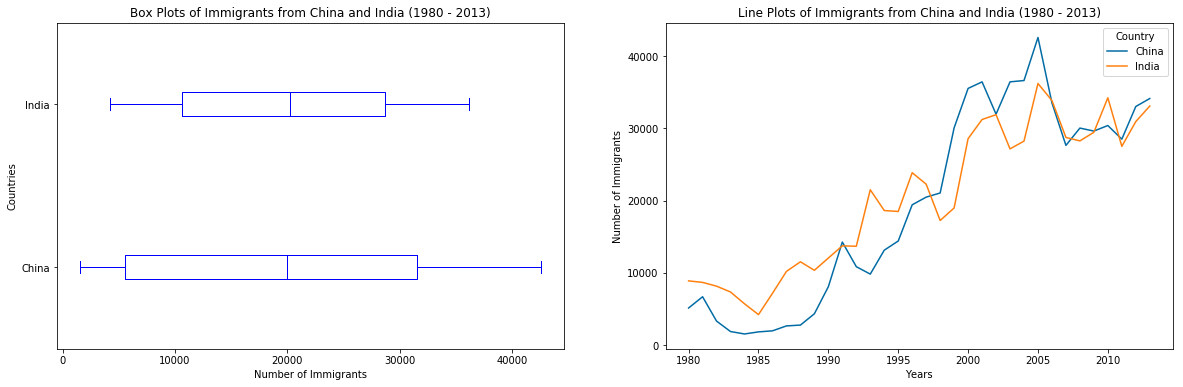

In [95]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

** * Tip regarding subplot convention **

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that the a 3 digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,
```python
   subplot(211) == subplot(2, 1, 1) 
```
produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

Let's try something a little more advanced.

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset.

In [96]:
#  Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.
df_can.sort_values('Total',ascending=True,inplace=True)
df_top15 = df_can.tail(15)
df_top15 = df_top15.transpose()
df_top15.head()

Country,Romania,Viet Nam,Jamaica,France,Lebanon,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
Continent,Europe,Asia,Latin America and the Caribbean,Europe,Asia,Europe,Asia,Asia,Asia,Northern America,Asia,Asia,Europe,Asia,Asia
Region,Eastern Europe,South-Eastern Asia,Caribbean,Western Europe,Western Asia,Eastern Europe,Eastern Asia,Southern Asia,Southern Asia,Northern America,Southern Asia,South-Eastern Asia,Northern Europe,Eastern Asia,Southern Asia
DevName,Developed regions,Developing regions,Developing regions,Developed regions,Developing regions,Developed regions,Developing regions,Developing regions,Developing regions,Developed regions,Developing regions,Developing regions,Developed regions,Developing regions,Developing regions
1980,375,1191,3198,1729,1409,863,1011,185,1172,9378,978,6051,22045,5123,8880
1981,438,1829,2634,2027,1119,2930,1456,371,1429,10030,972,5921,24796,6682,8670


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

Create a list of all years in decades 80's, 90's, and 00's.
Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
Merge the three series into a new data frame. Call your dataframe new_df.

In [97]:
# create a list of all years in decades 80's, 90's, and 00's
Eighties=list(range(1980,1990))
Nineties=list(range(1990,2000))
Twenties=list(range(2000,2010))
# slice the original dataframe df_can to create a series for each decade
df_Eighties =  df_top15.loc[Eighties,:].sum(axis=0)
df_Nineties =  df_top15.loc[Nineties,:].sum(axis=0)
df_Twenties =  df_top15.loc[Twenties,:].sum(axis=0)
# merge the three series into a new data frame

df_top15_2 = pd.DataFrame({'80s': df_Eighties,'90s':df_Nineties,'00s':df_Twenties})

# display dataframe
df_top15_2


,80s,90s,00s
Country,,,
Romania,7613.0,33659.0,45515.0
Viet Nam,30638.0,37726.0,21274.0
Jamaica,34328.0,40329.0,22733.0
France,17137.0,30028.0,41297.0
Lebanon,24918.0,49245.0,30906.0
Poland,57602.0,64864.0,13629.0
Republic of Korea,16259.0,38189.0,68183.0
Sri Lanka,14796.0,70421.0,49678.0
Iran (Islamic Republic of),21477.0,54871.0,65794.0


Let's learn more about the statistics associated with the dataframe using the `describe()` method.

Step 3: Plot the box plots.

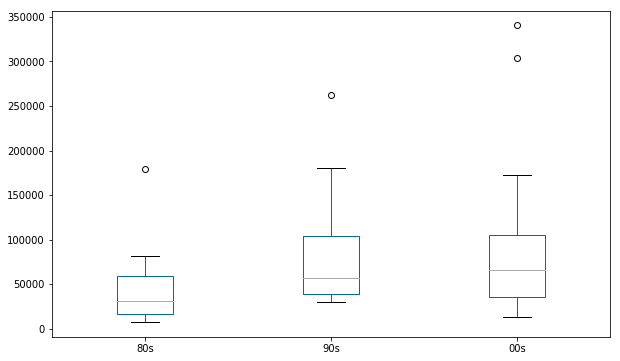

In [98]:
# Generate plot
df_top15_2.plot(kind='box',figsize=(10,6))


In [99]:
# let's check how many entries fall above the outlier threshold 
df_top15_2[df_top15_2['00s']>209611]

,80s,90s,00s
Country,,,
China,32003.0,161528.0,340385.0
India,82154.0,180395.0,303591.0


The box plot is an advanced visualizaiton tool, and there are many options and customizations. Please refer to Matplotlib documentation on box plots for more information.

## Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it for prediction.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. 

In [100]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

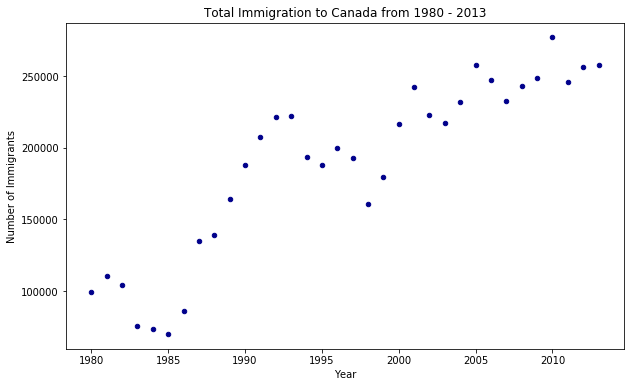

In [101]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the datapoints together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit). 

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:
- `x`: x-coordinates of the data. 
- `y`: y-coordinates of the data. 
- `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [102]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a*x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1. 

Step 2: Plot the regression line on the `scatter plot`.

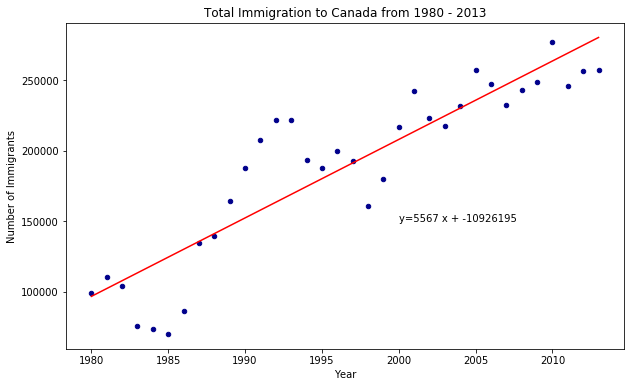

'No. Immigrants = 5567 * Year + -10926195'

In [103]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:
```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```
When compared to the actuals from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe that consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**. Then transpose it.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [1]:
# write your answer here
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years]
#df_countries.head()
df_total = pd.DataFrame(df_countries.sum(axis=0))
df_total['year'] = df_total.index
df_total.columns=['total','year']
df_total.head()

NameError: name 'df_can' is not defined

In [ ]:
df_countries.head()

Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

Text(0,0.5,'totals')

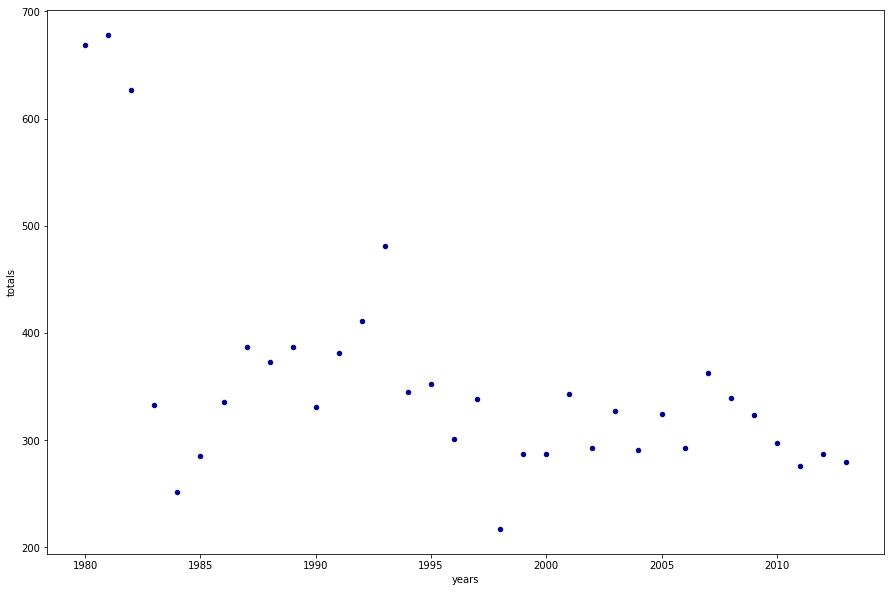

In [109]:
#The correct answer is:
df_total.plot(kind='scatter', x='year',y='total',figsize=(15,10),color='darkblue')
plt.xlabel('years')
plt.ylabel('totals')

# Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002. 

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.

Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will bring the `Years` in the dataframe.

In [210]:
df_can_t = df_can[years].transpose() # transposed dataframe


# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


Step 2: Create the normalized weights. 

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range [0,1]. The general formula is:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

where *`X`* is an original value, *`X'`* is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.


In [211]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Step 3: Plot the data. 
- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
- We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

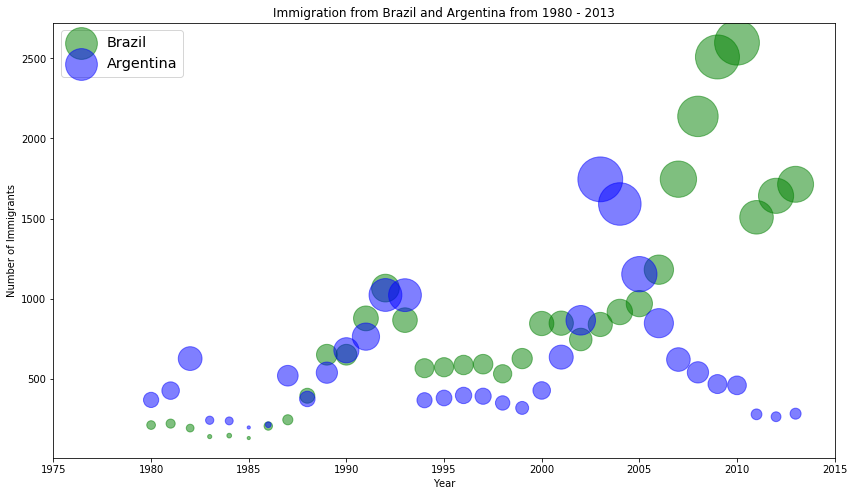

In [213]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [ ]:
# write your answer here



Step 2: Generate the bubble plots.

In [ ]:
# write your answer here
